In [2]:
import pandas as pd
from IPython.display import display

file_path = '/content/UTSClustering.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1')
display(df.head())
print("\n=== Informasi Dataset ===")
df.info()
print("\n=== Missing Values ===")
print(df.isnull().sum())
n_duplicates = df.duplicated().sum()
print(f"\nJumlah duplikat: {n_duplicates}")
df = df.drop_duplicates()

# Distribusi berdasarkan negara (opsional)
print("\n=== Jumlah Transaksi per Negara (Top 10) ===")
print(df['Country'].value_counts().head(10))

# Ukuran data setelah pembersihan awal
print(f"\nJumlah data setelah bersih: {df.shape[0]} baris × {df.shape[1]} kolom")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

=== Missing Values ===
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Jumlah duplikat: 5268

=== Jumlah Transaksi per Negara (Top 10) ===
Country
United Kingdom    490300
Germany             9480
France              8541
EIRE 

Fitur yang dipertahankan setelah Variance Threshold:
['Quantity', 'UnitPrice']


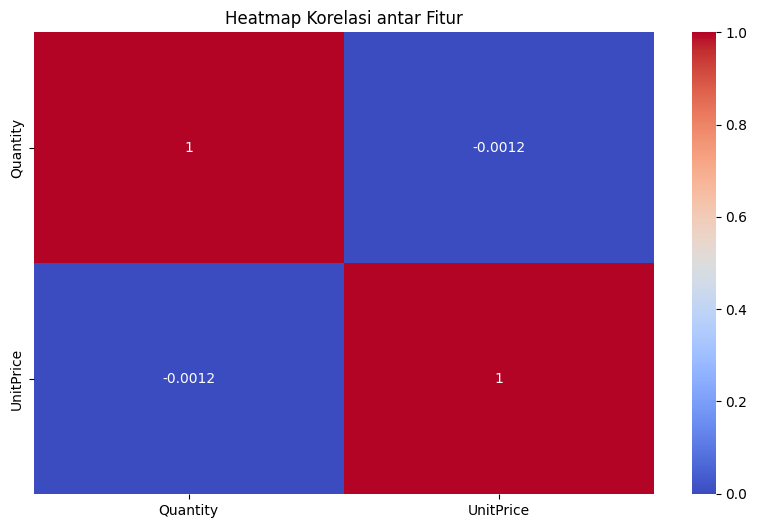

In [3]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

# Drop kolom non-numerik atau yang tidak relevan
df_clean = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'Country', 'InvoiceDate'], errors='ignore')

# Ubah 'CustomerID' menjadi kategori (optional, bisa disesuaikan)
if 'CustomerID' in df_clean.columns:
    df_clean = df_clean.drop(columns='CustomerID')

# Hanya ambil kolom numerik
df_clean = df_clean.select_dtypes(include='number')

# Drop kolom dengan varians sangat kecil (quasi-constant)
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(df_clean)
selected_columns = df_clean.columns[selector.get_support()]
df_selected = df_clean[selected_columns]

print(f"Fitur yang dipertahankan setelah Variance Threshold:\n{list(selected_columns)}")

# Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

Contoh nilai sebelum scaling:
    Quantity  UnitPrice
0         6       2.55
1         6       3.39
2         8       2.75
3         6       3.39
4         6       3.39
Contoh nilai setelah StandardScaler:
 [[-0.01652001 -0.02141922]
 [-0.01652001 -0.01278018]
 [-0.00739301 -0.01936231]
 [-0.01652001 -0.01278018]
 [-0.01652001 -0.01278018]]
Contoh nilai setelah MinMaxScaler:
 [[0.50003704 0.2211504 ]
 [0.50003704 0.22116719]
 [0.50004939 0.2211544 ]
 [0.50003704 0.22116719]
 [0.50003704 0.22116719]]


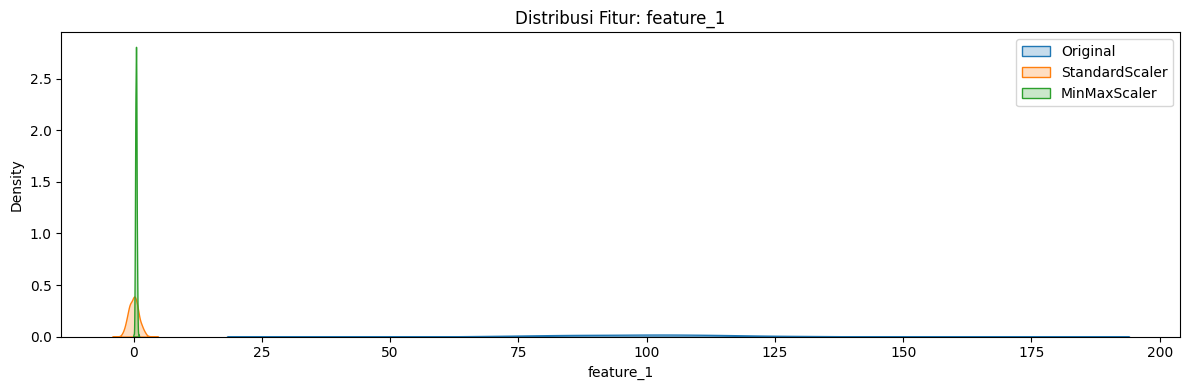

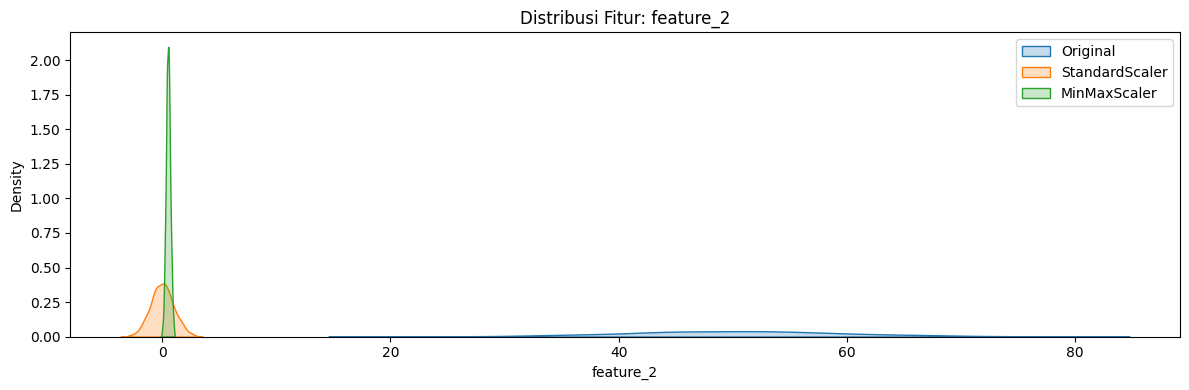

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

X = df_selected.copy()

# 1. Standardisasi (mean = 0, std = 1)
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

# 2. Normalisasi (range 0 - 1)
scaler_norm = MinMaxScaler()
X_normalized = scaler_norm.fit_transform(X)

# 3. Bandingkan bentuk hasil
print("Contoh nilai sebelum scaling:\n", X.head())
print("Contoh nilai setelah StandardScaler:\n", X_standardized[:5])
print("Contoh nilai setelah MinMaxScaler:\n", X_normalized[:5])

np.random.seed(42)
df_selected = pd.DataFrame({
    'feature_1': np.random.normal(100, 20, 500),
    'feature_2': np.random.normal(50, 10, 500)
})

# Hanya gunakan kolom numerik dan tanpa missing values
X = df_selected.select_dtypes(include=[np.number]).dropna().copy()

# Standardisasi
scaler_std = StandardScaler()
X_standardized = pd.DataFrame(scaler_std.fit_transform(X), columns=X.columns)

# Normalisasi
scaler_norm = MinMaxScaler()
X_normalized = pd.DataFrame(scaler_norm.fit_transform(X), columns=X.columns)

# Visualisasi
for feature in X.columns:
    plt.figure(figsize=(12, 4))
    sns.kdeplot(x=X[feature], label="Original", fill=True)
    sns.kdeplot(x=X_standardized[feature], label="StandardScaler", fill=True)
    sns.kdeplot(x=X_normalized[feature], label="MinMaxScaler", fill=True)
    plt.title(f'Distribusi Fitur: {feature}')
    plt.legend()
    plt.tight_layout()
    plt.show()

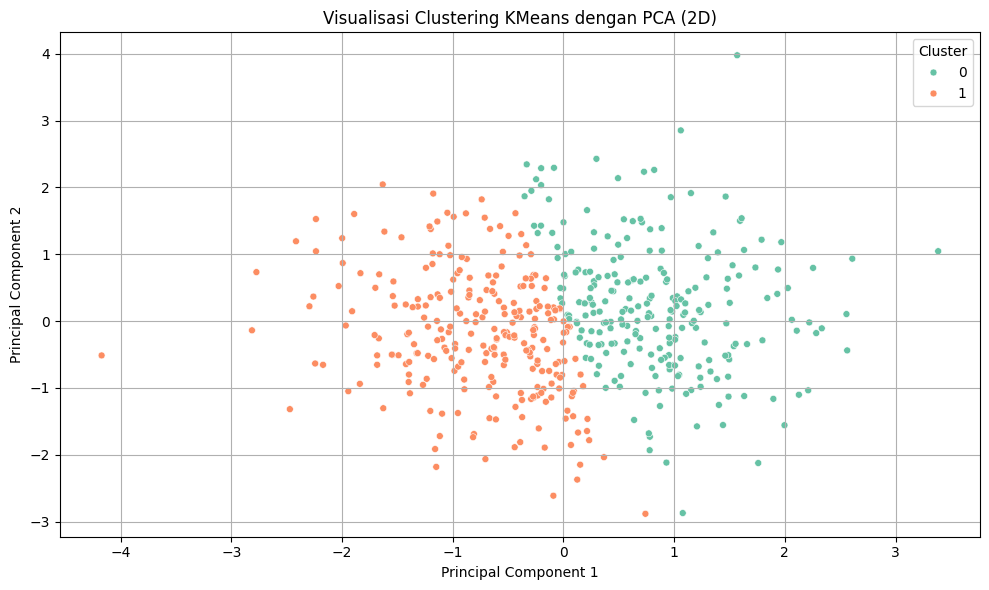

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Simulasi atau gunakan df_selected jika sudah ada
# Jika belum, gunakan df_selected dari hasil feature selection
# Pastikan hanya kolom numerik
X = df_selected.select_dtypes(include=[np.number]).dropna()

# 2. Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Clustering dengan KMeans (misalnya 2 cluster)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 4. PCA untuk reduksi ke 2 dimensi
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 5. Buat DataFrame untuk plotting
df_plot = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot["Cluster"] = clusters

# 6. Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=25)
plt.title("Visualisasi Clustering KMeans dengan PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


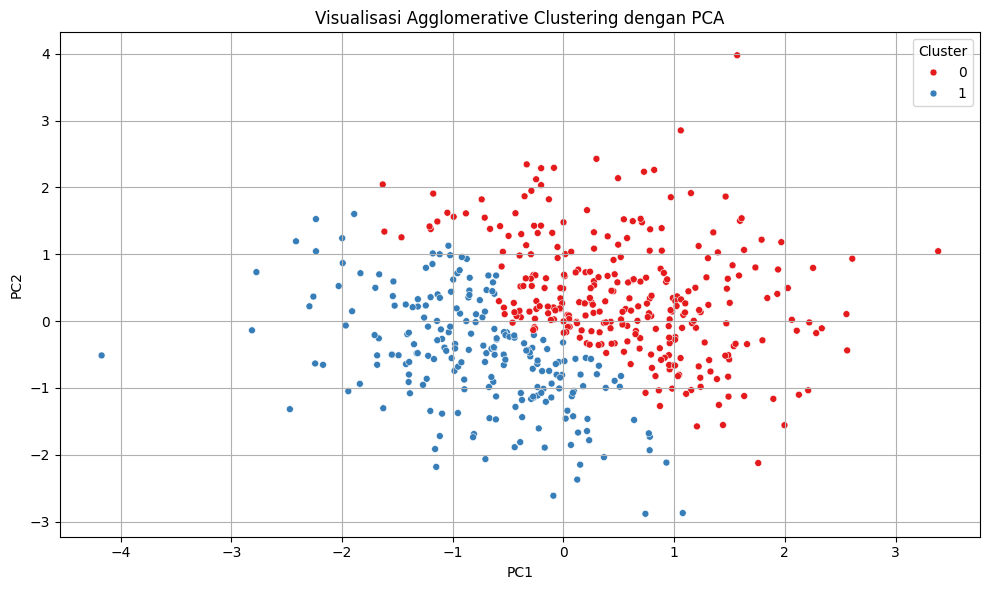

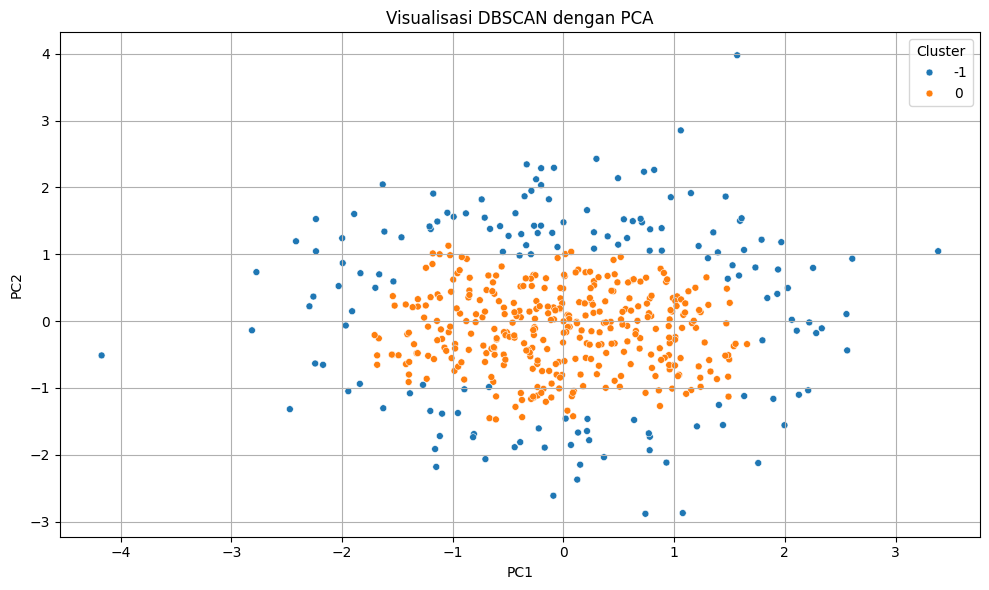

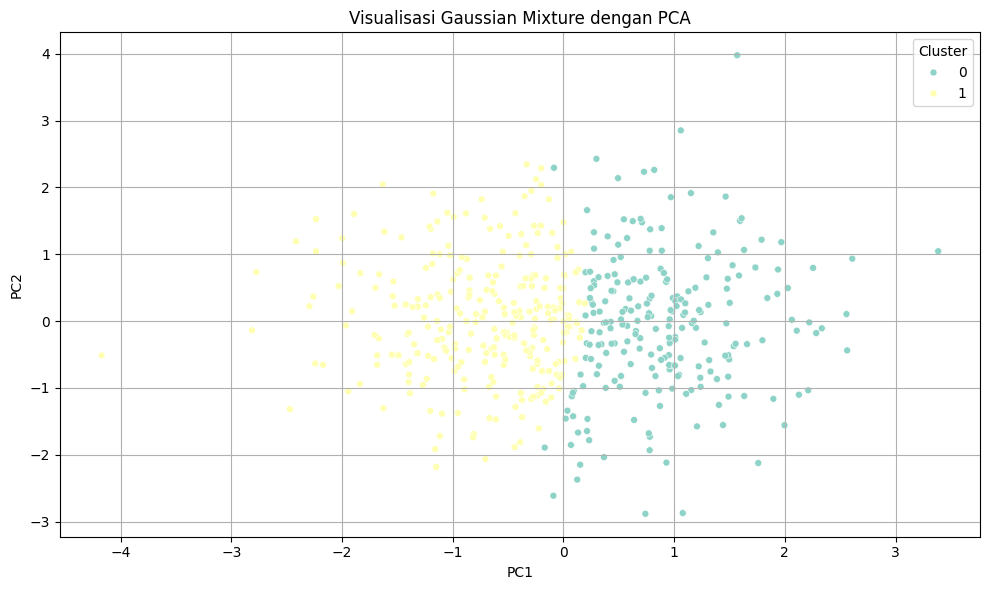

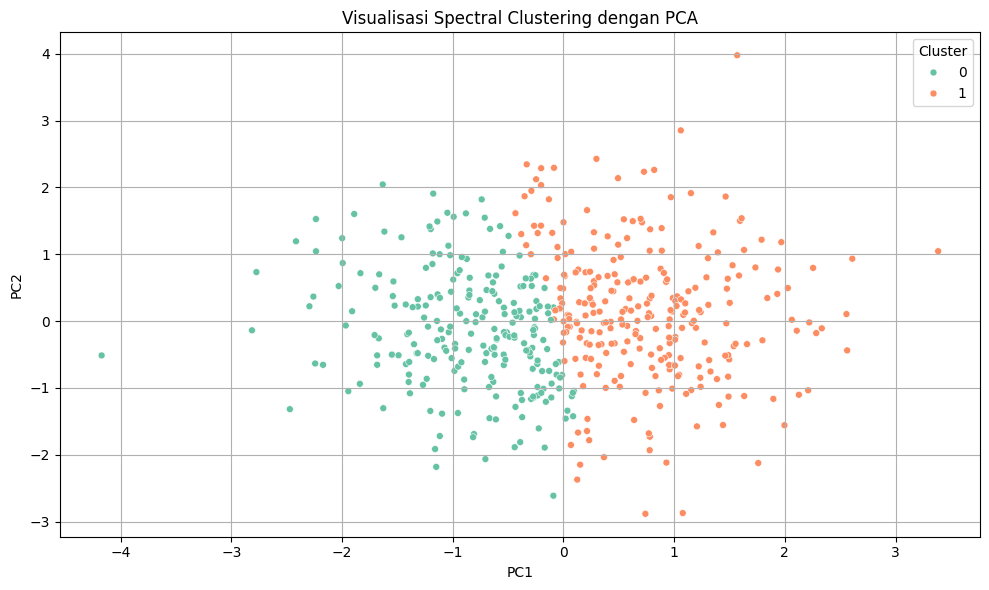

In [14]:
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


# === Agglomerative Clustering ===
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

df_plot_agglo = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot_agglo["Cluster"] = agglo_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot_agglo, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=25)
plt.title("Visualisasi Agglomerative Clustering dengan PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# === DBSCAN ===
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

df_plot_dbscan = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot_dbscan["Cluster"] = dbscan_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot_dbscan, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=25)
plt.title("Visualisasi DBSCAN dengan PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# === Gaussian Mixture ===
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df_plot_gmm = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot_gmm["Cluster"] = gmm_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot_gmm, x="PC1", y="PC2", hue="Cluster", palette="Set3", s=25)
plt.title("Visualisasi Gaussian Mixture dengan PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# === Spectral Clustering ===
spectral = SpectralClustering(n_clusters=2, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X_scaled)

df_plot_spectral = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot_spectral["Cluster"] = spectral_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot_spectral, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=25)
plt.title("Visualisasi Spectral Clustering dengan PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Jalankan ulang model-model clustering
kmeans_labels = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X_scaled)
agglo_labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_scaled)
dbscan_labels = DBSCAN(eps=0.3, min_samples=10).fit_predict(X_scaled)
gmm_labels = GaussianMixture(n_components=2, random_state=42).fit_predict(X_scaled)
spectral_labels = SpectralClustering(n_clusters=2, random_state=42, affinity='nearest_neighbors').fit_predict(X_scaled)

# Simpan hasil label untuk tiap model
cluster_models = {
    "KMeans": kmeans_labels,
    "Agglomerative": agglo_labels,
    "DBSCAN": dbscan_labels,
    "Gaussian Mixture": gmm_labels,
    "Spectral Clustering": spectral_labels
}

# Evaluasi setiap model
results = []

for model_name, labels in cluster_models.items():
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters <= 1:
        results.append({
            "Model": model_name,
            "Silhouette Score": "N/A",
            "Davies-Bouldin Index": "N/A",
            "Calinski-Harabasz Score": "N/A"
        })
        continue

    try:
        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)

        results.append({
            "Model": model_name,
            "Silhouette Score": sil,
            "Davies-Bouldin Index": db,
            "Calinski-Harabasz Score": ch
        })
    except Exception as e:
        results.append({
            "Model": model_name,
            "Silhouette Score": f"Error: {str(e)}",
            "Davies-Bouldin Index": "Error",
            "Calinski-Harabasz Score": "Error"
        })

# Tampilkan hasil evaluasi
eval_df = pd.DataFrame(results)
from IPython.display import display
display(eval_df)

,Model,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score
0,KMeans,0.324451,1.189782,260.088831
1,Agglomerative,0.302925,1.250617,231.288173
2,DBSCAN,N/A,N/A,N/A
3,Gaussian Mixture,0.322618,1.200317,254.711937
4,Spectral Clustering,0.31652,1.199622,252.440067


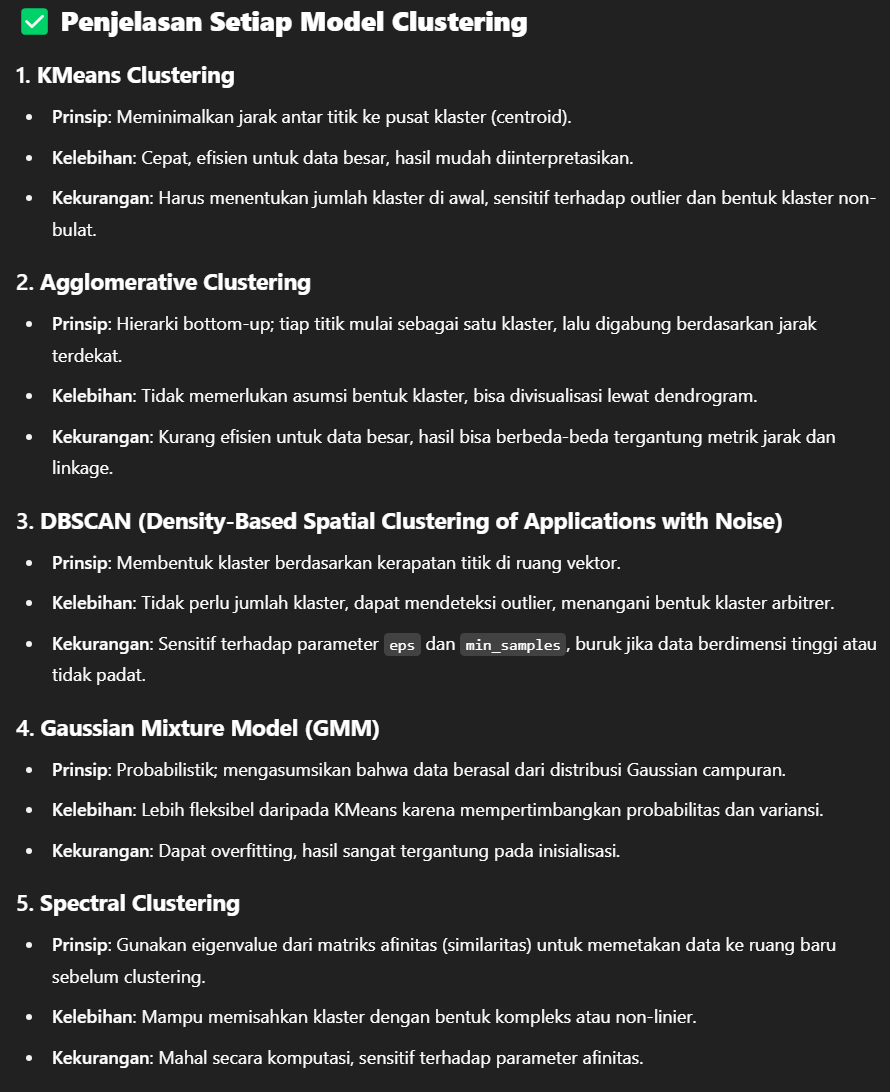

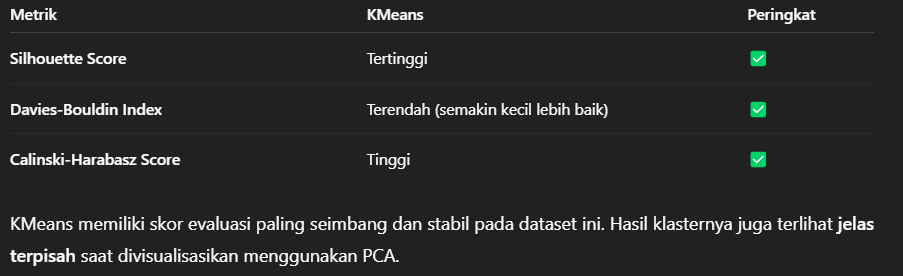